## Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [82]:
cd data

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/data


In [4]:
#pip install pyarrow fastparquet ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 6.0 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


## Data

In [24]:
y = pd.read_csv('y_a.csv', index_col='time', parse_dates=True)
X_est = pd.read_csv('X_est.csv', index_col='date_forecast', parse_dates=True)
X_obs = pd.read_csv('X_obs.csv', index_col='date_forecast', parse_dates=True)

y.drop(['Unnamed: 0'], axis=1, inplace=True)
X_est.drop(['Unnamed: 0'], axis=1, inplace=True)
X_obs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
X_test = pd.read_csv('X_est.csv', index_col='date_forecast', parse_dates=True)

X_test.drop(['Unnamed: 0'], axis=1, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'X_test.csv'

In [83]:
# Train
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [84]:
# X_train_estimated
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

In [85]:
# X_train_observed
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

In [86]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [6]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(X_train_estimated_a, title="Profiling Report")
#profile.to_file("Marijan.html")

In [152]:
X = pd.merge(X_obs, y, left_index=True, right_index=True)

## Some plots

<Axes: xlabel='time'>

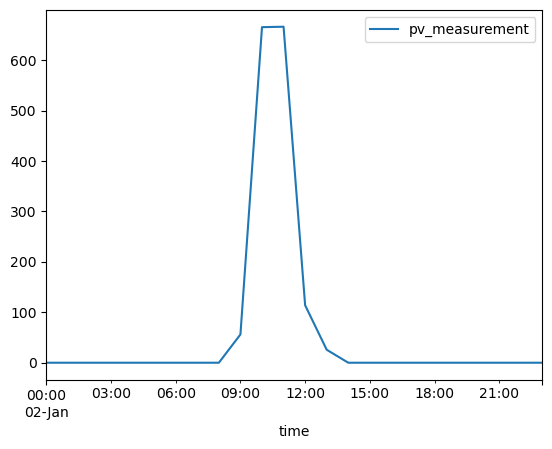

In [20]:
y.loc['2021-01-02'].resample('H').mean().plot()

(<Axes: xlabel='date_forecast'>, <Axes: xlabel='time'>)

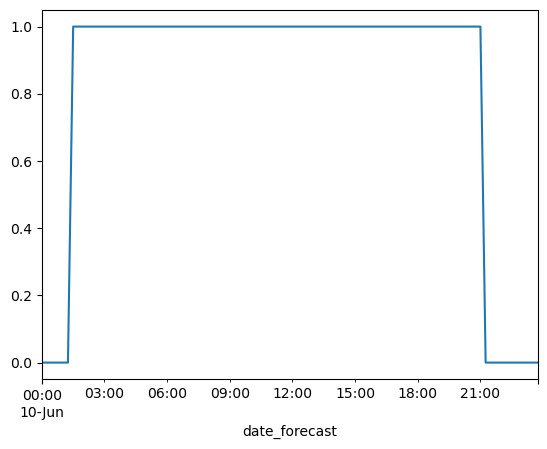

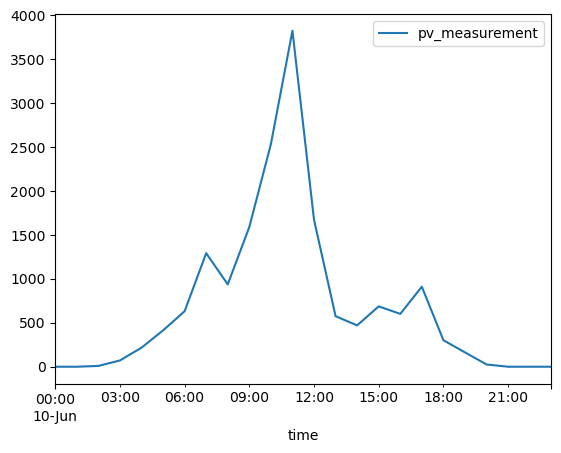

In [70]:
X_obs['is_day:idx'].loc['2019-06-10'].plot(), y.loc['2019-06-10'].plot()

In [71]:
y_

,pv_measurement
time,
2019-06-02 22:00:00,0
2019-06-02 23:00:00,0
2019-06-03 00:00:00,0
2019-06-03 01:00:00,0
2019-06-03 02:00:00,0
...,...
2023-04-30 19:00:00,0
2023-04-30 20:00:00,0
2023-04-30 21:00:00,0


<Axes: xlabel='time'>

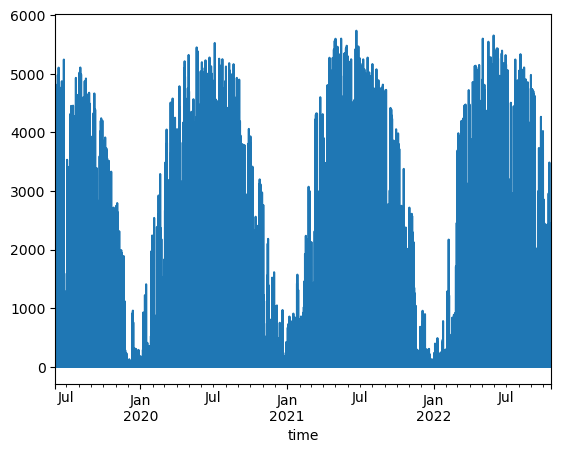

In [56]:
y.loc['2019-06-02 22:00:00':'2022-10-21 01:00:00']['pv_measurement'].plot()

In [54]:
np.dot(X_obs['is_day:idx'].loc['2019-06-02 22:00:00':'2022-10-21 00:00:00'][::4], y.loc['2019-06-02 22:00:00':'2022-10-21 01:00:00']['pv_measurement'])

19963312.59999999

<Axes: xlabel='time'>

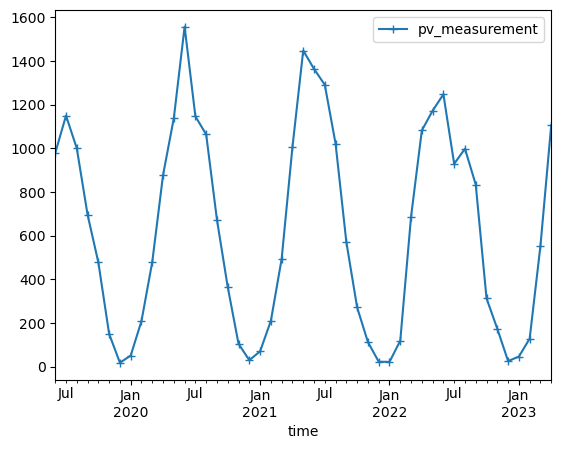

In [194]:
y.loc[:].resample('M').mean().plot(marker='+')

<Axes: xlabel='time'>

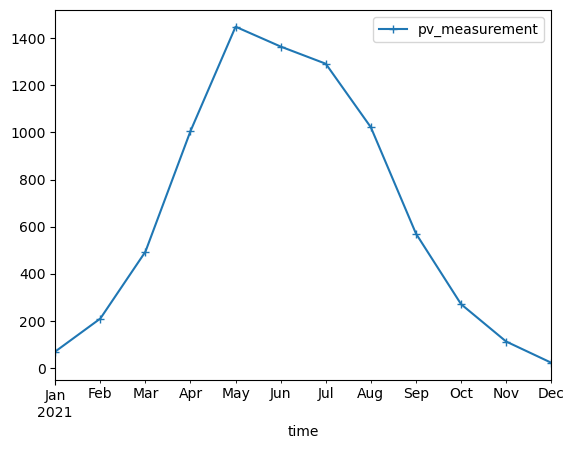

In [189]:
y.loc['2021'].resample('M').mean().plot(marker='+')

(<Axes: xlabel='time'>, <Axes: xlabel='time'>)

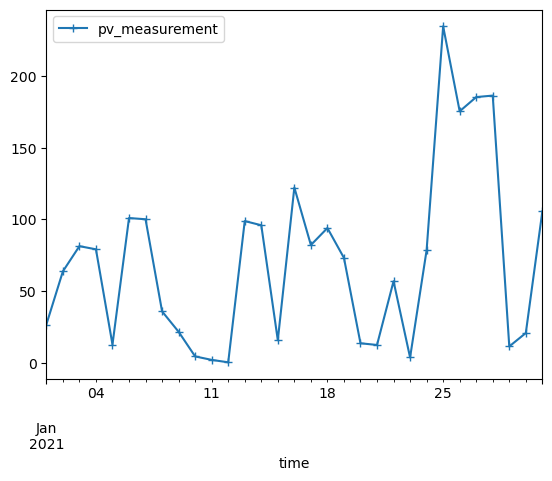

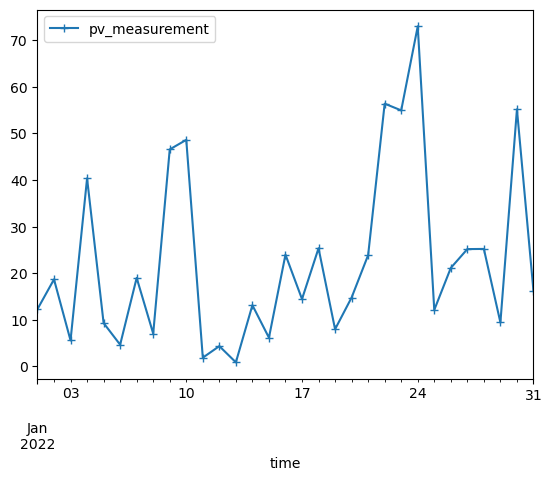

In [192]:
y.loc['2021-01'].resample('D').mean().plot(marker='+'),y.loc['2022-01'].resample('D').mean().plot(marker='+')

(<AxesSubplot: xlabel='date_forecast'>,)

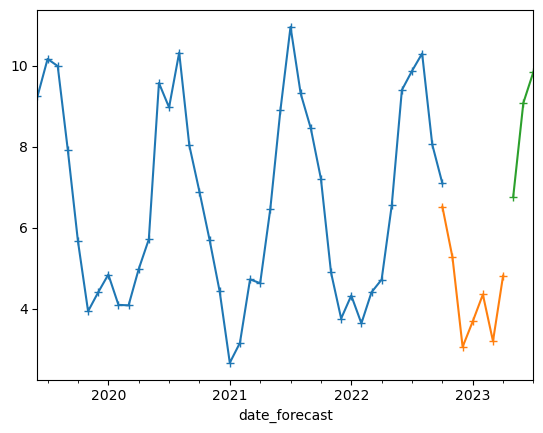

In [41]:
X_obs['absolute_humidity_2m:gm3'].resample('M').mean().plot(marker='+'), 
X_est['absolute_humidity_2m:gm3'].resample('M').mean().plot(marker='+'), 
X_test['absolute_humidity_2m:gm3'].resample('M').mean().plot(marker='+'), 

Idea : apply a linear transformation to obtain a X_obs based on X_est, for the same seasonality. 

(<AxesSubplot: xlabel='date_forecast'>,)

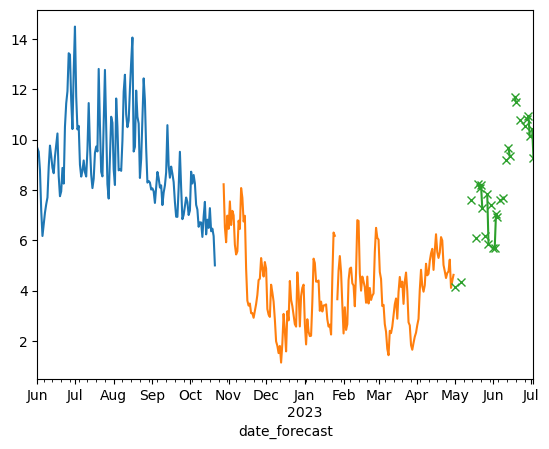

In [47]:
X_obs['absolute_humidity_2m:gm3'].loc['2022-06':].resample('D').mean().plot(),
X_est['absolute_humidity_2m:gm3'].resample('D').mean().plot(),
X_test['absolute_humidity_2m:gm3'].resample('D').mean().plot(marker='x'),

In [6]:
X_obs.index

DatetimeIndex(['2019-06-02 22:00:00', '2019-06-02 22:15:00',
               '2019-06-02 22:30:00', '2019-06-02 22:45:00',
               '2019-06-02 23:00:00', '2019-06-02 23:15:00',
               '2019-06-02 23:30:00', '2019-06-02 23:45:00',
               '2019-06-03 00:00:00', '2019-06-03 00:15:00',
               ...
               '2022-10-20 22:45:00', '2022-10-20 23:00:00',
               '2022-10-20 23:15:00', '2022-10-20 23:30:00',
               '2022-10-20 23:45:00', '2022-10-21 00:00:00',
               '2022-10-21 00:15:00', '2022-10-21 00:30:00',
               '2022-10-21 00:45:00', '2022-10-21 01:00:00'],
              dtype='datetime64[ns]', name='date_forecast', length=118669, freq=None)

(<Axes: xlabel='date_forecast'>, <Axes: xlabel='date_forecast'>)

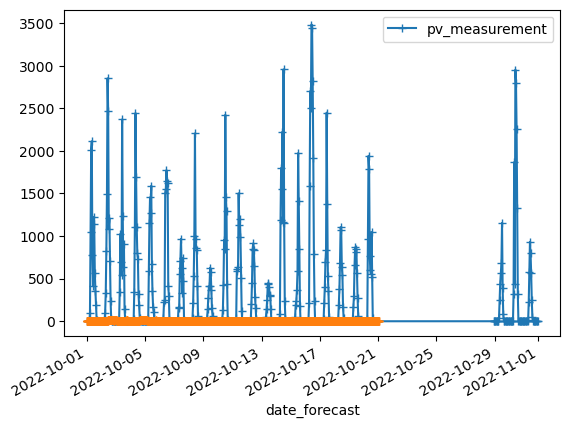

In [98]:
y.loc['2022-10'].plot(marker='+'), X_obs['absolute_humidity_2m:gm3'].loc['2022-10'].plot(marker='+')

(<AxesSubplot: xlabel='date_forecast'>,)

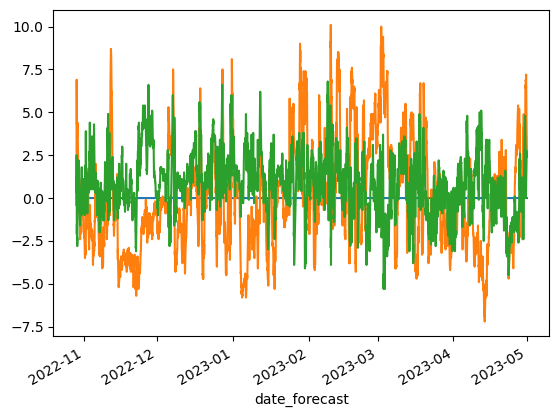

In [116]:
X_est['wind_speed_w_1000hPa:ms'].plot(), 
X_est['wind_speed_u_10m:ms'].plot(), 
X_est['wind_speed_v_10m:ms'].plot(), 

<AxesSubplot: xlabel='time'>

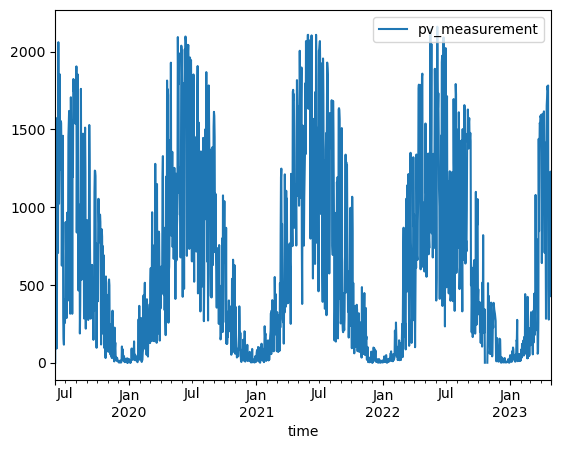

In [279]:
y.resample('d').mean().plot()

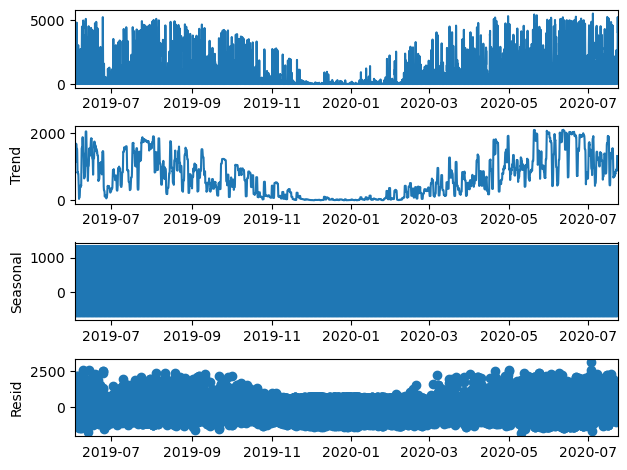

In [179]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = y.iloc[:10000]
result = seasonal_decompose(series, model='additive') # 'multiplicative'
result.plot()
plt.show()

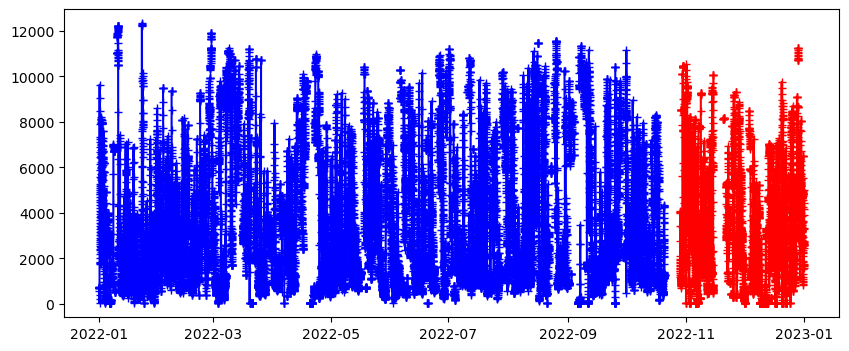

In [3]:
fig = plt.figure()
fig.set_size_inches(10, 4)
# Tracer le premier graphique dans la première colonne
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_est['ceiling_height_agl:m'].loc['2022'], color='r',marker='+')
ax.plot(X_obs['ceiling_height_agl:m'].loc['2022'], color='b',marker='+')

/var/folders/c6/6v_rvxyj6rj6m70q6t5cvn3w0000gn/T/ipykernel_2505/140188494.py:4: UserWarning: When passing multiple axes, layout keyword is ignored.
  X_obs.plot(subplots=True, layout=(9, 5), ax=axes)


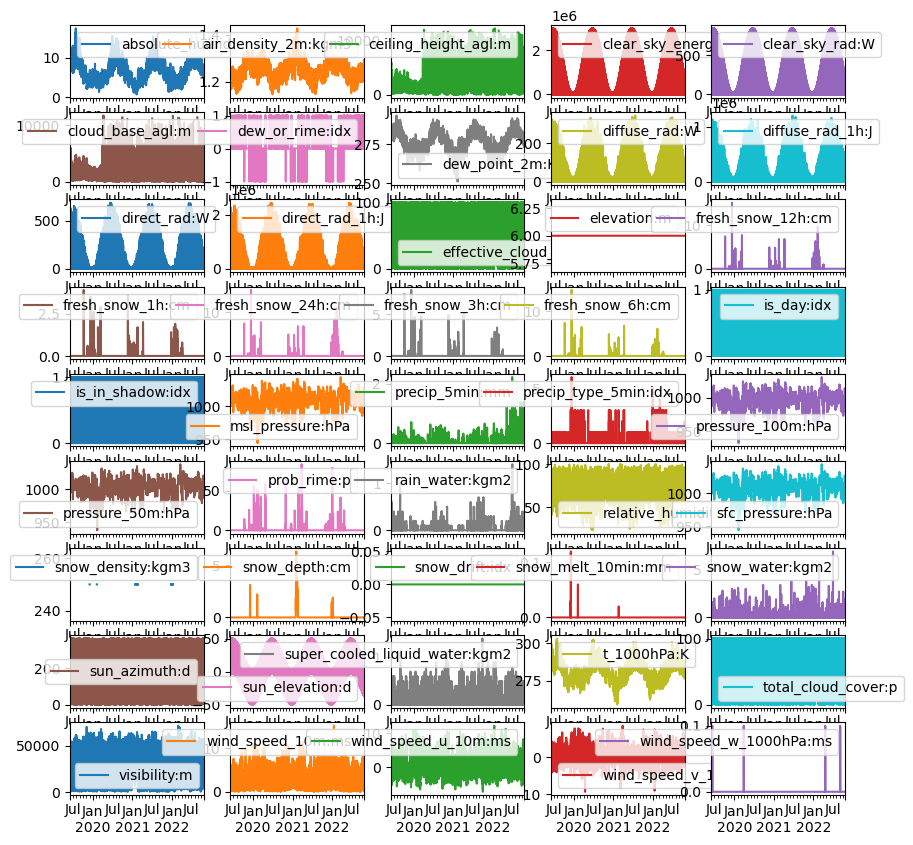

In [61]:
fig, axes = plt.subplots(9, 5, figsize=(10, 10))

# Assuming X_obs is a DataFrame or Series
X_obs.plot(subplots=True, layout=(9, 5), ax=axes)

# Remove x-axis and y-axis labels from all subplots
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.savefig('test.png')
plt.show()

## Correlations = delete some features

In [118]:
np.var(X).sort_values()

elevation:m                       0.000000e+00
snow_density:kgm3                 0.000000e+00
snow_drift:idx                    0.000000e+00
wind_speed_w_1000hPa:ms           2.358967e-06
snow_melt_10min:mm                3.535439e-06
air_density_2m:kgm3               1.320849e-03
precip_5min:mm                    1.488095e-03
rain_water:kgm2                   2.346108e-03
fresh_snow_1h:cm                  5.789223e-03
super_cooled_liquid_water:kgm2    1.265533e-02
fresh_snow_3h:cm                  3.320738e-02
dew_or_rime:idx                   3.649161e-02
snow_water:kgm2                   6.680970e-02
fresh_snow_6h:cm                  9.418421e-02
precip_type_5min:idx              1.422511e-01
snow_depth:cm                     1.679445e-01
fresh_snow_12h:cm                 2.401482e-01
is_day:idx                        2.495251e-01
is_in_shadow:idx                  2.498085e-01
fresh_snow_24h:cm                 5.565313e-01
wind_speed_10m:ms                 3.212296e+00
wind_speed_v_

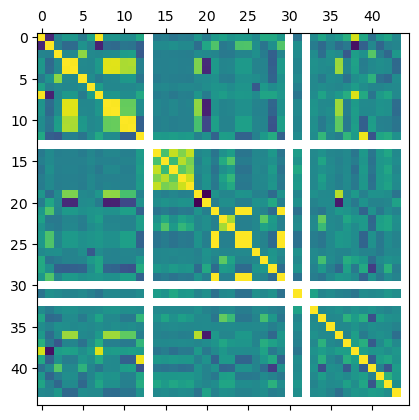

In [62]:
plt.matshow(X_est.drop('date_calc', axis=1).corr())

In [120]:
X_est.drop('date_calc', axis=1).corr()#.sort_values()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
absolute_humidity_2m:gm3,1.000000,-0.690102,-0.045890,0.102485,0.097802,-0.111364,0.193974,0.982592,0.074830,0.080729,0.019649,0.022738,0.238624,NaN,-0.127256,-0.083282,-0.166690,-0.095418,-0.106228,0.091862,-0.099436,0.108173,0.176984,0.071394,0.120442,0.113266,0.003416,0.254522,0.246827,0.106184,NaN,-0.171660,NaN,0.010174,0.206981,0.032640,0.113055,0.297441,0.878075,0.240667,-0.188444,0.111328,0.210022,-0.013165,NaN
air_density_2m:kgm3,-0.690102,1.000000,-0.067123,-0.245232,-0.231391,0.069202,-0.064271,-0.727686,-0.229981,-0.244088,-0.158725,-0.172310,-0.326939,NaN,0.004857,0.005847,0.042675,0.003409,0.001027,-0.216830,0.220163,0.477907,-0.132591,-0.078725,0.467799,0.475168,0.033831,-0.165054,0.046587,0.482417,NaN,0.043254,NaN,-0.105856,-0.242391,-0.059026,-0.222312,-0.131118,-0.818526,-0.313371,-0.015075,-0.277502,-0.067851,-0.036435,NaN
ceiling_height_agl:m,-0.045890,-0.067123,1.000000,-0.003922,-0.013235,0.674636,-0.007968,-0.025706,0.008776,0.016030,0.148830,0.160805,-0.371939,NaN,-0.084403,-0.067968,-0.073360,-0.083123,-0.087018,0.017165,-0.013780,-0.038631,-0.133992,-0.118482,-0.035909,-0.036479,0.048233,-0.106362,-0.321103,-0.037100,NaN,0.009499,NaN,0.022714,-0.215333,0.053130,0.011983,-0.372423,0.158678,0.056289,0.496063,-0.091859,-0.260067,0.100406,NaN
clear_sky_energy_1h:J,0.102485,-0.245232,-0.003922,1.000000,0.990549,-0.010291,-0.018737,0.115195,0.904585,0.917539,0.756767,0.763401,-0.077058,NaN,-0.064476,-0.067529,-0.063178,-0.076765,-0.073392,0.621940,-0.676899,0.127009,-0.039672,-0.027015,0.125286,0.122781,-0.053016,-0.048436,-0.337346,0.120320,NaN,-0.045123,NaN,0.061022,0.012643,0.037737,0.714865,-0.041572,0.189169,-0.095633,0.002708,0.035973,0.007870,-0.253380,NaN
clear_sky_rad:W,0.097802,-0.231391,-0.013235,0.990549,1.000000,-0.014867,-0.018866,0.110050,0.913957,0.909655,0.761263,0.753342,-0.073295,NaN,-0.061086,-0.065467,-0.062670,-0.072913,-0.068120,0.623729,-0.683576,0.127647,-0.037299,-0.024786,0.125653,0.123286,-0.052023,-0.050085,-0.315803,0.120959,NaN,-0.045347,NaN,0.055290,0.013583,0.001462,0.717627,-0.037455,0.172211,-0.091906,-0.006493,0.028355,0.007275,-0.242548,NaN
cloud_base_agl:m,-0.111364,0.069202,0.674636,-0.010291,-0.014867,1.000000,0.019365,-0.102809,-0.021695,-0.018395,0.100803,0.111180,-0.165402,NaN,-0.102624,-0.070638,-0.081103,-0.087146,-0.095028,-0.009947,0.012923,0.051083,-0.090352,-0.096475,0.051972,0.052318,0.030743,-0.038245,-0.292810,0.052641,NaN,-0.007809,NaN,-0.010141,-0.108368,0.024774,-0.000020,-0.189317,0.037372,0.098703,0.330044,-0.191471,-0.259500,0.023560,NaN
dew_or_rime:idx,0.193974,-0.064271,-0.007968,-0.018737,-0.018866,0.019365,1.000000,0.159645,-0.021295,-0.021045,-0.013563,-0.013549,0.027175,NaN,-0.026606,-0.017027,-0.041927,-0.012841,-0.016644,-0.031881,0.030764,0.081937,0.071045,0.019430,0.084382,0.083352,-0.370826,0.115722,0.019889,0.082343,NaN,-0.073356,NaN,-0.004573,0.029442,-0.008786,-0.026389,0.034786,0.149769,0.031921,-0.037225,-0.035064,0.003591,-0.005142,NaN
dew_point_2m:K,0.982592,-0.727686,-0.025706,0.115195,0.110050,-0.102809,0.159645,1.000000,0.088549,0.095201,0.020671,0.024153,0.248549,NaN,-0.094962,-0.064567,-0.135185,-0.071847,-0.078769,0.095134,-0.103404,0.095231,0.1583

<AxesSubplot: >

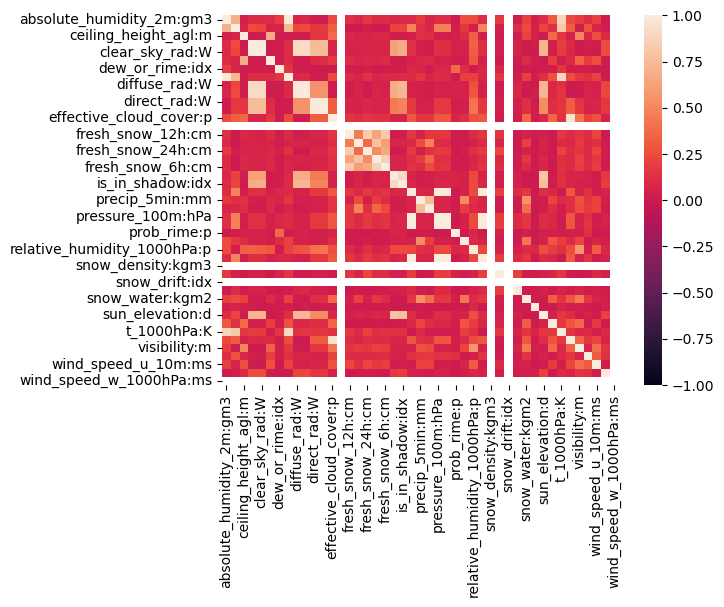

In [136]:
sns.heatmap(np.abs(X_est.drop('date_calc', axis=1).corr()), vmin=-1, vmax=1)#, annot=True)

<AxesSubplot: >

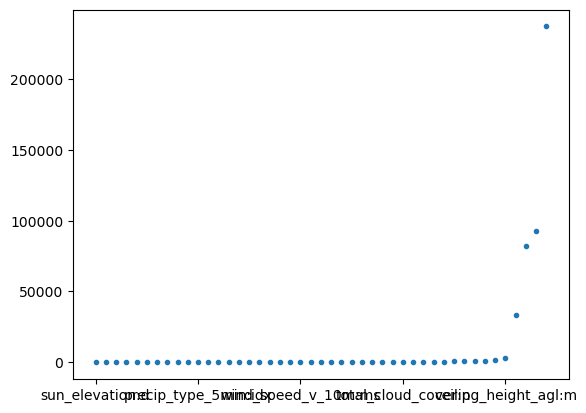

In [71]:
X_est.drop('date_calc', axis=1).mean().sort_values().plot(style='.') # .sort_values()

array([[<AxesSubplot: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_energy_1h:J'>,
        <AxesSubplot: xlabel='clear_sky_rad:W', ylabel='clear_sky_energy_1h:J'>],
       [<AxesSubplot: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_rad:W'>,
        <AxesSubplot: xlabel='clear_sky_rad:W', ylabel='clear_sky_rad:W'>]],
      dtype=object)

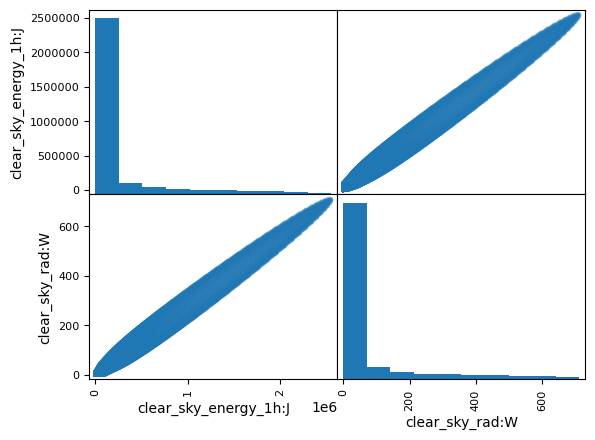

In [142]:
pd.plotting.scatter_matrix(X_est.drop('date_calc', axis=1).iloc[:,3:5])#.corr()

In [148]:
X.columns

Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms', 'wind_speed_v_10

array([[<AxesSubplot: xlabel='diffuse_rad:W', ylabel='diffuse_rad:W'>,
        <AxesSubplot: xlabel='clear_sky_energy_1h:J', ylabel='diffuse_rad:W'>],
       [<AxesSubplot: xlabel='diffuse_rad:W', ylabel='clear_sky_energy_1h:J'>,
        <AxesSubplot: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_energy_1h:J'>]],
      dtype=object)

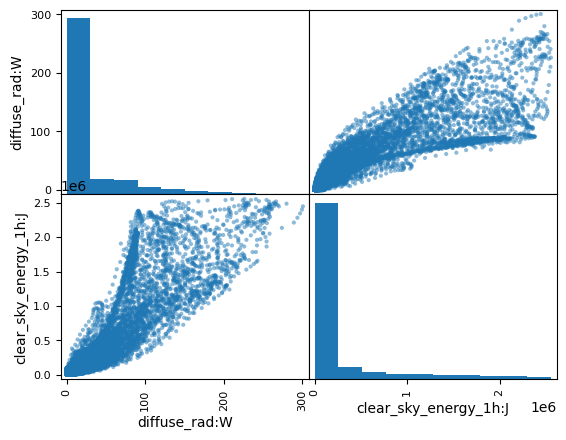

In [154]:
pd.plotting.scatter_matrix(X_est[['diffuse_rad:W', 'clear_sky_energy_1h:J']])

In [145]:
X.drop(['pv_measurement'], axis=1).corr()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
absolute_humidity_2m:gm3,1.000000,-0.803326,0.076754,0.352669,0.349790,0.020805,0.122575,0.974811,0.285767,0.291530,0.240221,0.244153,0.021417,NaN,-0.118776,-0.068740,-0.148366,-0.084930,-0.098726,0.306243,-0.318807,0.147742,0.066528,-0.020847,0.165235,0.154298,-0.056014,0.259310,0.160696,0.143369,NaN,-0.203651,NaN,-0.014042,0.033415,0.023750,0.432066,0.107140,0.899403,0.042977,-0.157191,-0.156987,0.050194,-0.256651,0.002927
air_density_2m:kgm3,-0.803326,1.000000,-0.149976,-0.474399,-0.463730,-0.118813,-0.058673,-0.838085,-0.403882,-0.416646,-0.396005,-0.410888,-0.066099,NaN,0.062341,0.043633,0.074660,0.052358,0.058248,-0.387462,0.400142,0.280090,-0.081588,-0.013175,0.263772,0.275671,0.072178,-0.161855,0.142590,0.287497,NaN,0.316647,NaN,0.014537,-0.063243,-0.064139,-0.504546,-0.061943,-0.914845,-0.100941,-0.011992,-0.017662,0.025952,0.141692,0.003173
ceiling_height_agl:m,0.076754,-0.149976,1.000000,0.087360,0.079520,0.706390,0.043554,0.066227,0.097953,0.101989,0.271475,0.281170,-0.348479,NaN,-0.009282,-0.003529,-0.015660,-0.006524,-0.007522,0.051805,-0.057078,0.070416,0.001550,-0.046818,0.074072,0.071997,0.001681,-0.151619,-0.400662,0.069879,NaN,-0.057617,NaN,-0.030849,-0.170565,0.057474,0.079050,-0.330302,0.232093,0.030325,0.426252,-0.160138,-0.311788,0.000645,-0.000295
clear_sky_energy_1h:J,0.352669,-0.474399,0.087360,1.000000,0.992331,0.052849,-0.081113,0.361910,0.913991,0.923551,0.722851,0.733839,0.003392,NaN,-0.056937,-0.037781,-0.072858,-0.046831,-0.053043,0.650362,-0.692375,0.157719,-0.008976,-0.029600,0.160352,0.154114,-0.050674,0.054826,-0.339987,0.147875,NaN,-0.074666,NaN,-0.020500,-0.037108,0.038372,0.847857,0.016787,0.439300,0.010458,0.091826,0.013464,0.069669,-0.340359,-0.005202
clear_sky_rad:W,0.349790,-0.463730,0.079520,0.992331,1.000000,0.048901,-0.080447,0.359033,0.920057,0.915877,0.730378,0.730008,0.003844,NaN,-0.055355,-0.037536,-0.072678,-0.046207,-0.052124,0.650762,-0.696093,0.158364,-0.009752,-0.029515,0.160682,0.154595,-0.050452,0.052756,-0.313426,0.148505,NaN,-0.074184,NaN,-0.020468,-0.039407,-0.015973,0.851628,0.017578,0.425132,0.010226,0.082866,0.003589,0.064025,-0.325320,-0.007277
cloud_base_agl:m,0.020805,-0.118813,0.706390,0.052849,0.048901,1.000000,0.037569,0.011512,0.036535,0.040458,0.234547,0.241771,-0.329153,NaN,-0.006881,-0.003691,-0.007437,-0.006798,-0.008928,0.016528,-0.019476,0.038796,-0.022395,-0.070958,0.042157,0.040453,0.021426,-0.111394,-0.453720,0.038711,NaN,-0.057937,NaN,-0.018717,-0.117254,0.046501,0.035930,-0.262091,0.198188,-0.071687,0.453645,-0.191220,-0.392595,0.057235,-0.001230
dew_or_rime:idx,0.122575,-0.058673,0.043554,-0.081113,-0.080447,0.037569,1.000000,0.122914,-0.081409,-0.083184,-0.056226,-0.057131,-0.050966,NaN,-0.010774,-0.010881,-0.013471,-0.010683,-0.011769,-0.103758,0.101198,0.006677,-0.010952,-0.018203,0.010445,0.009503,-0.162775,-0.007454,0.100930,0.008596,NaN,-0.015377,NaN,-0.003935,-0.022695,-0.032112,-0.073038,-0.036991,0.108185,-0.033963,-0.030082,-0.108904,-0.039055,0.004990,-0.001832
dew_point_2m:K,0.974811,-0.838085,0.066227,0.361910,0.359033,0.011512,0.122914,1.000000,0.297785,0.303535,0.246408,0.250556,0.058611,NaN,-0.126135,-0.075679,-0.155511,-0.092707,-0.106614,0.312253,-0

<AxesSubplot: >

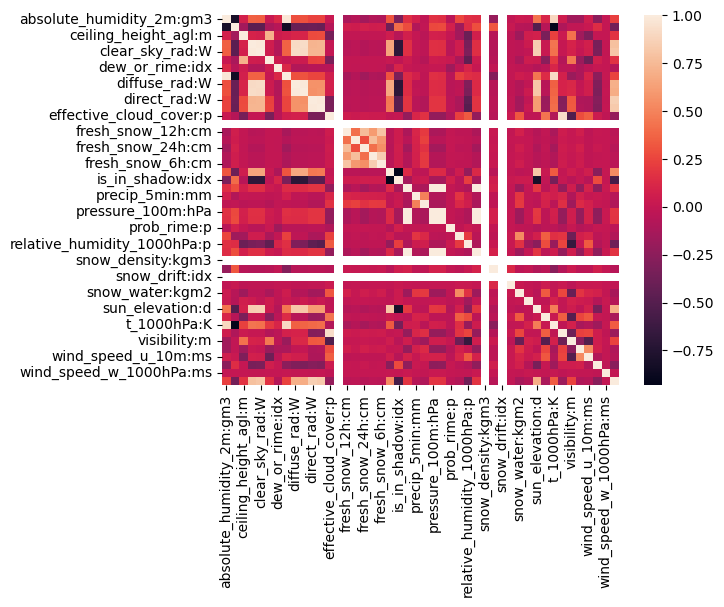

In [116]:
sns.heatmap(X.corr())

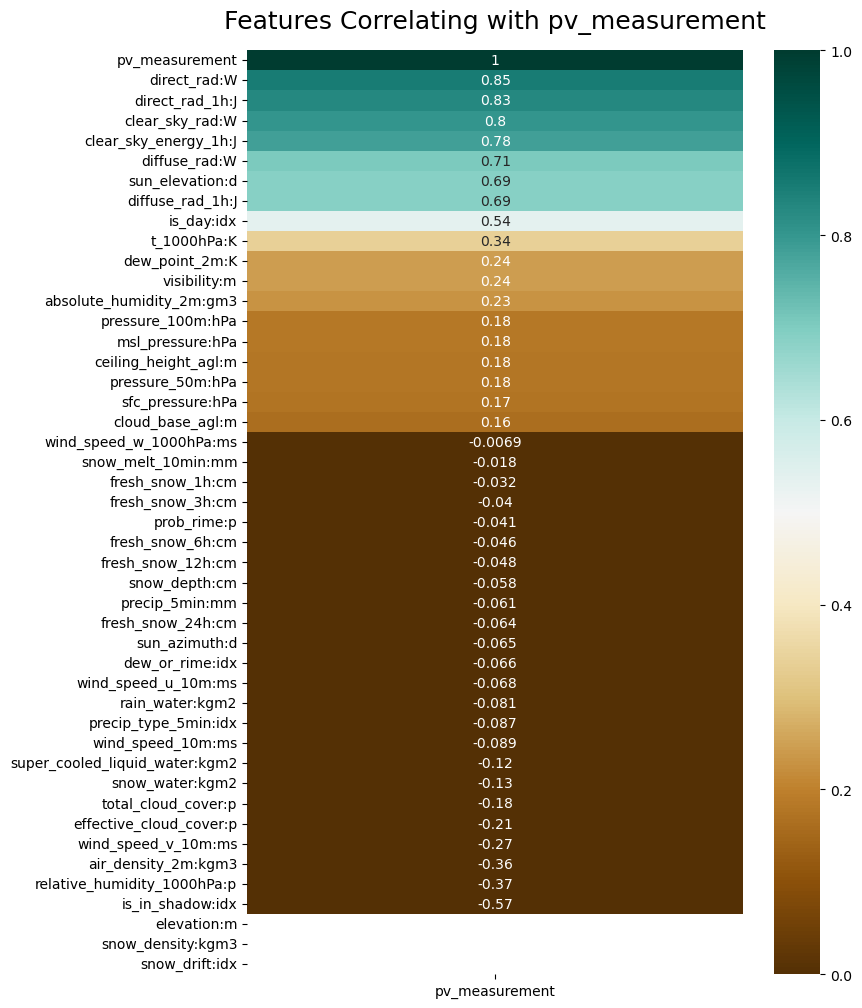

In [73]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(X.corr()[['pv_measurement']].sort_values(by='pv_measurement', ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with pv_measurement', fontdict={'fontsize':18}, pad=16);

In [ ]:
[('absolute_humidity_2m:gm3', 'dew_point_2m:K'), 23,24
 
 ('clear_sky_energy_1h:J', 'clear_sky_rad:W'), 78,80
 ('diffuse_rad:W', 'diffuse_rad_1h:J'), 71, 69
 ('direct_rad:W', 'direct_rad_1h:J'), 85, 83
 
 ('effective_cloud_cover:p', 'total_cloud_cover:p'), -21, -18
 
 ('msl_pressure:hPa', 'pressure_100m:hPa'), 18,18, 
 ('msl_pressure:hPa', 'pressure_50m:hPa'), 18, 18
 ('msl_pressure:hPa', 'sfc_pressure:hPa'), 18, 17
 ('pressure_100m:hPa', 'pressure_50m:hPa'), 18, 18
 ('pressure_100m:hPa', 'sfc_pressure:hPa'),18 17
 ('pressure_50m:hPa', 'sfc_pressure:hPa')] 18 17

In [1]:
abs(X.corr()[['pv_measurement']])

NameError: name 'X' is not defined

In [8]:
X_est

,date_calc,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-28 22:00:00,2022-10-27 07:00:18,8.4,1.233,1425.1,0.0,0.0,1211.7,1.0,281.4,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.1,0.0,0.0,988.5,994.5,0.0,0.0,92.7,1000.6,NaN,0.0,0.0,-0.0,0.4,340.799,-38.467,0.0,284.7,100.0,29429.7,0.8,-0.4,0.7,-0.0
2022-10-28 22:15:00,2022-10-27 07:00:18,8.4,1.233,2085.9,0.0,0.0,1560.5,1.0,281.3,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.8,0.0,0.0,988.2,994.2,0.0,0.1,92.7,1000.3,NaN,0.0,0.0,-0.0,0.4,345.452,-38.955,0.0,284.7,100.0,23604.1,0.7,-0.4,0.7,-0.0
2022-10-28 22:30:00,2022-10-27 07:00:18,8.3,1.233,2746.6,0.0,0.0,1909.4,1.0,281.2,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.4,0.0,0.0,987.9,993.9,0.0,0.1,92.7,1000.0,NaN,0.0,0.0,-0.0,0.5,350.153,-39.310,0.0,284.7,100.0,17799.8,0.7,-0.3,0.6,-0.0
2022-10-28 22:45:00,2022-10-27 07:00:18,8.3,1.233,3407.4,0.0,0.0,2258.2,1.0,281.2,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.1,0.0,0.0,987.6,993.6,0.0,0.1,92.6,999.7,NaN,0.0,0.0,-0.0,0.6,354.887,-39.529,0.0,284.6,100.0,12016.5,0.6,-0.2,0.6,-0.0
2022-10-28 23:00:00,2022-10-27 07:00:18,8.2,1.233,4068.2,0.0,0.0,2607.0,1.0,281.1,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.8,0.0,0.0,987.3,993.3,0.0,0.1,92.6,999.3,NaN,0.0,0.0,-0.0,0.6,359.638,-39.609,0.0,284.6,100.0,6254.4,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 22:45:00,2023-04-29 07:00:05,4.5,1.281,1173.9,0.0,0.0,536.5,0.0,272.3,0.0,0.0,0.0,0.0,99.6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.3,0.0,0.0,1001.1,1007.4,0.0,0.0,79.6,1013.7,NaN,0.0,0.0,-0.0,0.1,352.920,-11.731,0.1,274.2,99.9,11629.3,3.9,2.9,2.5,-0.0
2023-04-30 23:00:00,2023-04-29 07:00:05,4.5,1.281,1054.2,0.0,0.0,542.4,0.0,272.2,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.3,0.0,0.0,1001.1,1007.3,0.0,0.0,80.0,1013.6,NaN,0.0,0.0,-0.0,0.1,356.634,-11.884,0.1,274.2,100.0,9923.2,3.7,2.8,2.4,-0.0
2023-04-30 23:15:00,2023-04-29 07:00:05,4.5,1.281,1435.8,0.0,0.0,531.8,0.0,272.3,0.0,0.0,0.0,0.0,99.4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.1,0.0,0.0,1000.9,1007.2,0.0,0.0,79.9,1013.5,NaN,0.0,0.0,-0.0,0.1,0.352,-11.928,0.1,274.2,99.9,11230.8,3.7,2.7,2.5,-0.0


In [97]:
X_train_estimated_a.drop(['date_calc'], axis=1, inplace=True)
X_train_estimated_a.set_index(['date_forecast'], inplace=True)

X_train_estimated_b.drop(['date_calc'], axis=1, inplace=True)
X_train_estimated_b.set_index(['date_forecast'], inplace=True)

X_train_estimated_c.drop(['date_calc'], axis=1, inplace=True)
X_train_estimated_c.set_index(['date_forecast'], inplace=True)

In [100]:
X_train_observed_a.set_index(['date_forecast'], inplace=True)
X_train_observed_b.set_index(['date_forecast'], inplace=True)
X_train_observed_c.set_index(['date_forecast'], inplace=True)

In [106]:
X_test_estimated_a.drop(['date_calc'], axis=1, inplace=True)
X_test_estimated_a.set_index(['date_forecast'], inplace=True)

X_test_estimated_b.drop(['date_calc'], axis=1, inplace=True)
X_test_estimated_b.set_index(['date_forecast'], inplace=True)

X_test_estimated_c.drop(['date_calc'], axis=1, inplace=True)
X_test_estimated_c.set_index(['date_forecast'], inplace=True)

In [122]:
def correlation(df, threshold=.95):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column]>threshold)]
    return set(to_drop)

In [123]:
correlation(X_train_estimated_a) &correlation(X_train_observed_a)&correlation(X_test_estimated_a)

{'clear_sky_rad:W',
 'dew_point_2m:K',
 'diffuse_rad_1h:J',
 'direct_rad_1h:J',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'sfc_pressure:hPa'}

In [28]:
X_obs.drop(X_obs[to_drop], axis=1)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,cloud_base_agl:m,dew_or_rime:idx,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.7,1.230,1744.9,0.0,1744.9,0.0,0.0,0.0,98.7,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.8,0.0,0.0,0.0,0.0,73.1,NaN,0.0,0.0,-0.0,0.1,342.834,-3.202,0.0,285.9,100.0,39640.1,3.7,-3.6,-0.8,-0.0
2019-06-02 22:15:00,7.7,1.229,1734.0,0.0,1734.0,0.0,0.0,0.0,99.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.5,0.0,0.0,0.0,0.0,72.2,NaN,0.0,0.0,-0.0,0.2,346.294,-3.650,0.0,286.1,100.0,40123.9,3.6,-3.6,-0.6,-0.0
2019-06-02 22:30:00,7.7,1.228,1723.5,0.0,1723.5,0.0,0.0,0.0,99.2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.1,0.0,0.0,0.0,0.0,71.2,NaN,0.0,0.0,-0.0,0.2,349.768,-3.998,0.0,286.3,100.0,40628.3,3.6,-3.6,-0.4,-0.0
2019-06-02 22:45:00,7.7,1.226,1713.4,0.0,1713.4,0.0,0.0,0.0,99.4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.8,0.0,0.0,0.0,0.0,70.2,NaN,0.0,0.0,-0.0,0.2,353.251,-4.247,0.0,286.6,100.0,41153.6,3.5,-3.5,-0.2,-0.0
2019-06-02 23:00:00,7.7,1.225,1703.6,0.0,1703.6,0.0,0.0,0.0,99.6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.5,0.0,0.0,0.0,0.0,69.2,NaN,0.0,0.0,-0.0,0.2,356.742,-4.393,0.0,286.8,100.0,41699.9,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-21 00:00:00,5.0,1.292,NaN,0.0,NaN,0.0,0.0,0.0,2.8,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.4,0.0,0.0,0.0,0.0,82.7,NaN,0.0,0.0,-0.0,0.0,16.612,-36.306,0.0,276.9,2.8,25791.0,1.3,-0.4,1.2,-0.0
2022-10-21 00:15:00,5.0,1.292,NaN,0.0,NaN,0.0,0.0,0.0,2.3,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.3,0.0,0.0,0.0,0.0,83.1,NaN,0.0,0.0,-0.0,0.0,21.133,-35.762,0.0,276.8,2.3,28560.6,1.4,-0.6,1.2,-0.0
2022-10-21 00:30:00,5.0,1.292,NaN,0.0,NaN,0.0,0.0,0.0,1.7,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.2,0.0,0.0,0.0,0.0,83.4,NaN,0.0,0.0,-0.0,0.0,25.594,-35.095,0.0,276.6,1.7,31317.8,1.4,-0.8,1.2,-0.0


## One hot encoding

<AxesSubplot: >

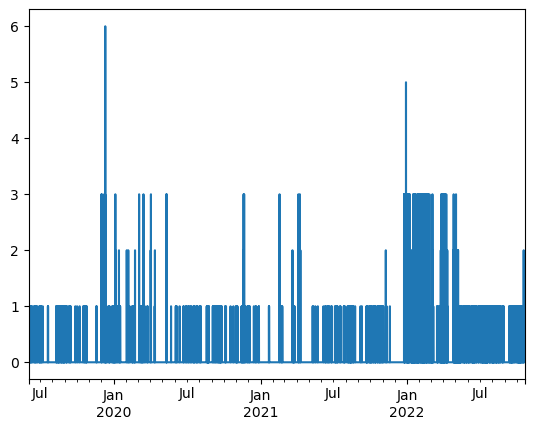

In [ ]:
X['precip_type_5min:idx'].plot()

In [147]:
idx = ['dew_or_rime:idx', 
       'is_day:idx', 
       'is_in_shadow:idx',
       'precip_type_5min:idx',
       'snow_drift:idx']

array([[<AxesSubplot: title={'center': 'dew_or_rime:idx'}>,
        <AxesSubplot: title={'center': 'is_day:idx'}>],
       [<AxesSubplot: title={'center': 'is_in_shadow:idx'}>,
        <AxesSubplot: title={'center': 'precip_type_5min:idx'}>],
       [<AxesSubplot: title={'center': 'snow_drift:idx'}>,
        <AxesSubplot: >]], dtype=object)

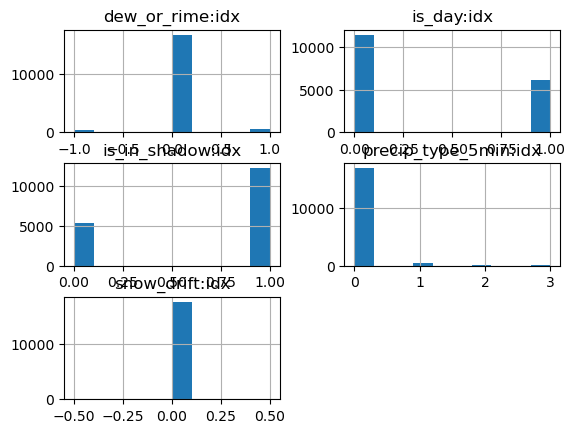

In [155]:
X_est[idx].hist()

In [162]:
X_idx = pd.DataFrame()
for id in idx:
    X_idx[id] = X_est[id].apply(lambda x:str(x))

In [168]:
X_idx = pd.get_dummies(X_idx)

<AxesSubplot: ylabel='date_forecast'>

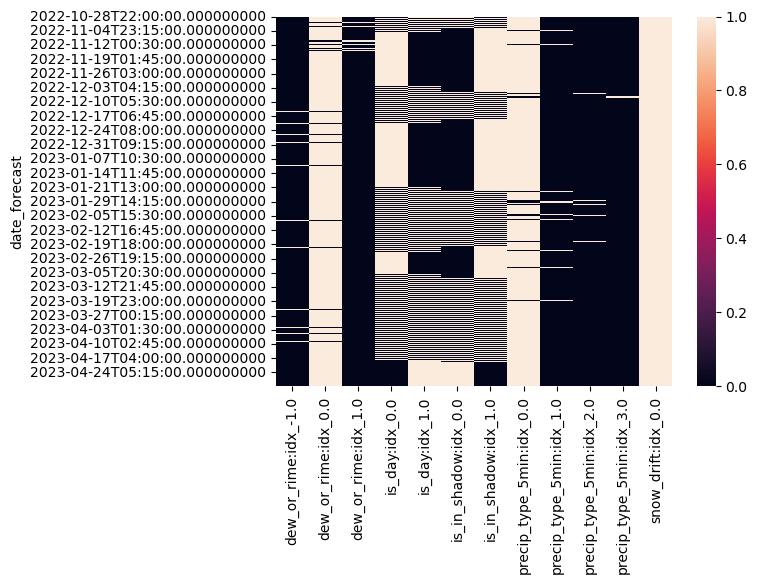

In [177]:
sns.heatmap(X_idx)

## Transformations

array([[<Axes: title={'center': 'absolute_humidity_2m:gm3'}>,
        <Axes: title={'center': 'air_density_2m:kgm3'}>],
       [<Axes: title={'center': 'ceiling_height_agl:m'}>,
        <Axes: title={'center': 'clear_sky_energy_1h:J'}>],
       [<Axes: title={'center': 'clear_sky_rad:W'}>, <Axes: >]],
      dtype=object)

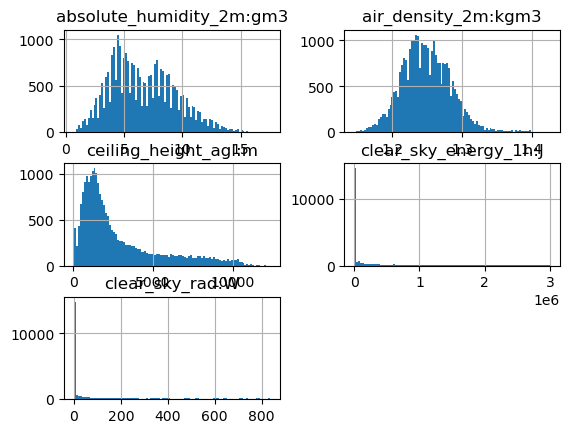

In [29]:
X.iloc[:,:5].hist(bins=100)
#sns.histplot(X.iloc[:,0])

<Axes: xlabel='absolute_humidity_2m:gm3', ylabel='Count'>

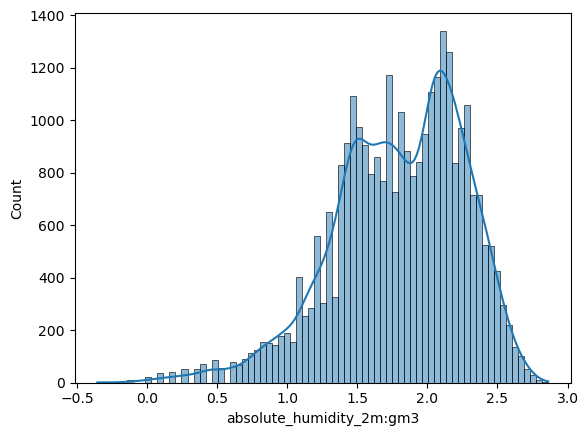

In [30]:
i = 0
feature = X.iloc[:,i]#.resample('M').mean()
#feature = (feature-np.mean(feature))/np.var(feature)
#feature = feature**2
feature = np.log(feature)
#sns.lineplot(feature)
sns.histplot(data=feature, kde=True)
#sns.kdeplot(feature)

In [230]:
features = X_obs.columns

In [234]:
len(y)

34085

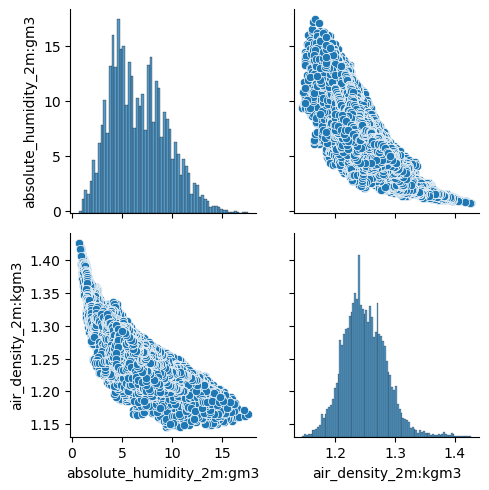

In [243]:
g = sns.PairGrid(X[features[:2]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [89]:
(X_est.index)[::4]

DatetimeIndex(['2022-10-28 22:00:00', '2022-10-28 23:00:00',
               '2022-10-29 00:00:00', '2022-10-29 01:00:00',
               '2022-10-29 02:00:00', '2022-10-29 03:00:00',
               '2022-10-29 04:00:00', '2022-10-29 05:00:00',
               '2022-10-29 06:00:00', '2022-10-29 07:00:00',
               ...
               '2023-04-30 14:00:00', '2023-04-30 15:00:00',
               '2023-04-30 16:00:00', '2023-04-30 17:00:00',
               '2023-04-30 18:00:00', '2023-04-30 19:00:00',
               '2023-04-30 20:00:00', '2023-04-30 21:00:00',
               '2023-04-30 22:00:00', '2023-04-30 23:00:00'],
              dtype='datetime64[ns]', name='date_forecast', length=4394, freq=None)

In [91]:
y.index

DatetimeIndex(['2019-06-02 22:00:00', '2019-06-02 23:00:00',
               '2019-06-03 00:00:00', '2019-06-03 01:00:00',
               '2019-06-03 02:00:00', '2019-06-03 03:00:00',
               '2019-06-03 04:00:00', '2019-06-03 05:00:00',
               '2019-06-03 06:00:00', '2019-06-03 07:00:00',
               ...
               '2023-04-30 14:00:00', '2023-04-30 15:00:00',
               '2023-04-30 16:00:00', '2023-04-30 17:00:00',
               '2023-04-30 18:00:00', '2023-04-30 19:00:00',
               '2023-04-30 20:00:00', '2023-04-30 21:00:00',
               '2023-04-30 22:00:00', '2023-04-30 23:00:00'],
              dtype='datetime64[ns]', name='time', length=34085, freq=None)

In [92]:
y.loc[X_est.index[::4]]

,pv_measurement
date_forecast,
2022-10-28 22:00:00,0.00
2022-10-28 23:00:00,0.00
2022-10-29 00:00:00,0.00
2022-10-29 01:00:00,0.00
2022-10-29 02:00:00,0.00
...,...
2023-04-30 19:00:00,9.02
2023-04-30 20:00:00,0.00
2023-04-30 21:00:00,0.00


## Missing values

<AxesSubplot: ylabel='date_forecast'>

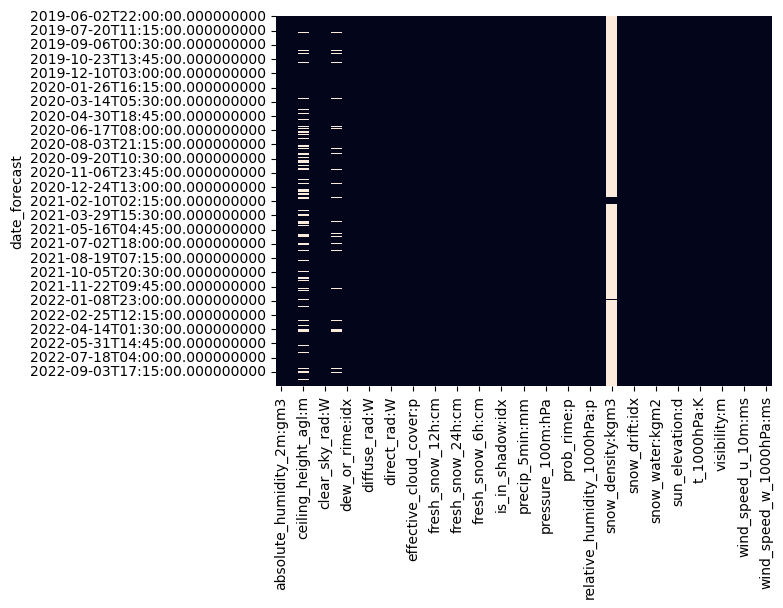

In [283]:
sns.heatmap(X_obs.isna(),cbar=False)

In [94]:
x.isna().mean()*100

ceiling_height_agl:m    18.747103
cloud_base_agl:m         6.797057
snow_density:kgm3       97.704540
dtype: float64

In [90]:
x.describe()

,ceiling_height_agl:m,cloud_base_agl:m,snow_density:kgm3
count,96422.000000,110603.000000,2724.0
mean,2907.949201,1737.142229,250.0
std,2570.413231,1815.584087,0.0
min,27.800000,27.900000,250.0
25%,1102.900000,590.700000,250.0
50%,1882.400000,1162.600000,250.0
75%,3969.750000,2079.600000,250.0
max,12328.500000,11688.700000,250.0


array([[<AxesSubplot: title={'center': 'ceiling_height_agl:m'}>,
        <AxesSubplot: title={'center': 'cloud_base_agl:m'}>],
       [<AxesSubplot: title={'center': 'snow_density:kgm3'}>,
        <AxesSubplot: >]], dtype=object)

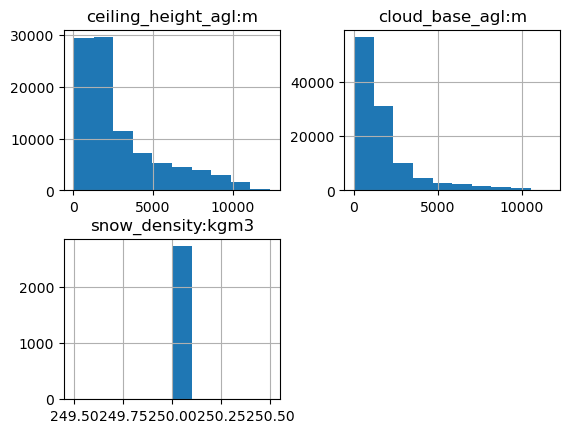

In [102]:
x.hist()

In [98]:
x_new = x.fillna(value={'snow_density:kgm3' : 0,
               'ceiling_height_agl:m' : x['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : x['cloud_base_agl:m'].mean()})

## Normalize

If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
fit_transform() means to fit() the data, then transform the same data.

In [295]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

‘fit(train)‘ to obtain parameters and ‘transform(test)‘ to apply
‘fit_transform(data) to perform both steps in one

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [ ]:
scaler = RobustScaler()
scaled = scaler.fit_transform(data)

## Metric

In [285]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_pred, y_true = 
mean_absolute_error(y_pred, 
                    y_true)

## Submission

In [290]:
test = pd.read_csv('test.csv')
test

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [291]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [292]:
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
#sample_submission.to_csv('my_first_submission.csv', index=False)

In [293]:
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [294]:
sample_submission.shape[0]/3//24

30.0

In [ ]:
#sample_submission.to_csv('SUB.csv', index=False)

## Models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

In [ ]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

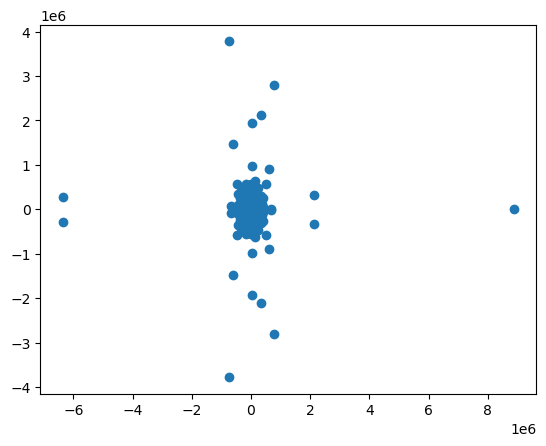

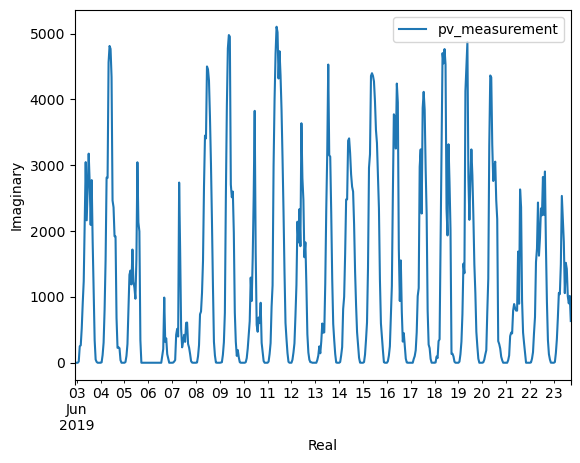

In [76]:
im = dft(y.loc['2019':'2020'])

# plot the complex numbers
plt.scatter(im.real, im.imag)
y.iloc[:500].plot()
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

In [5]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [49]:
N = 1200
T = 1.0 / 1600.0

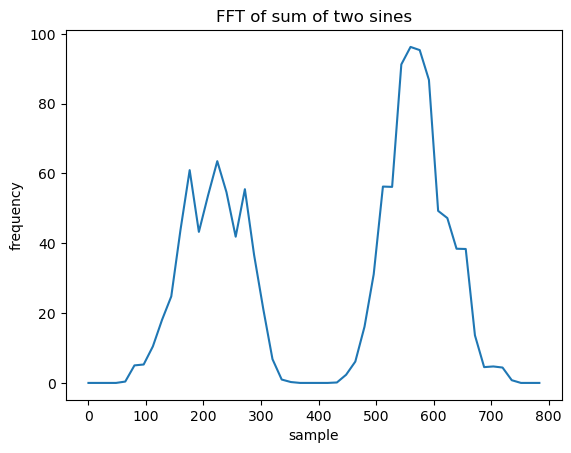

In [50]:
from scipy.fft import fft, fftfreq
sumf = fft(y.loc['2019'])
N=100
xf = fftfreq(N, T)[:N//2]
plt.ylabel('frequency')
plt.xlabel('sample')
plt.title("FFT of sum of two sines")
plt.plot(xf, 2.0/N * np.abs(sumf[0:N//2]))
plt.show()

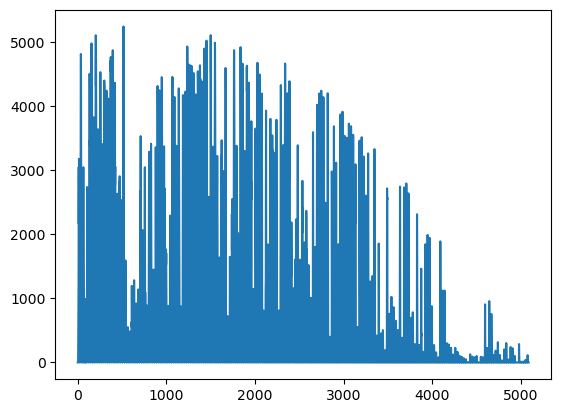

In [54]:
plt.plot(sumf.real)

# Transformation

In [60]:
li = [[x,''] for x in X.columns.tolist()]

In [43]:
def normalize(feature):
    return (feature - feature.min())/(feature.max()-feature.min())

In [41]:
X_new = X[X['pv_measurement']>0]

In [73]:
X_new.pv_measurement.shape

(16348,)

In [74]:
X.shape

(29667, 46)

<Axes: >

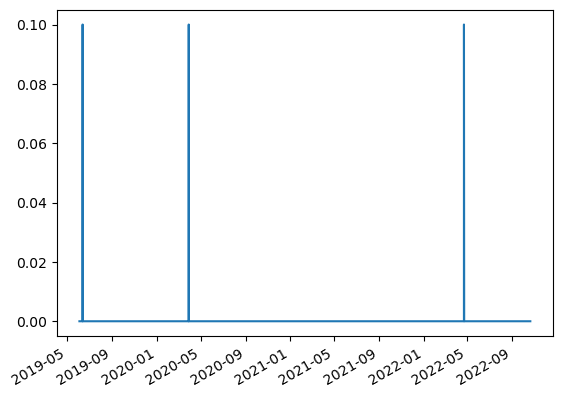

In [67]:
feature.loc[:].plot()

In [66]:
np.unique(feature)

array([-0. ,  0.1])

/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean 21.334745076437073 10.399150346110419 73.55686226663104 2.817483625090451 73.50908440636377 90.28276441854302
var f:584.6597608510618, f2:341.4922436462583, logf:420.4269232955756, f_1:135.7802427965854, logfc:421.66181092284813, loglogf:128.14564638800832


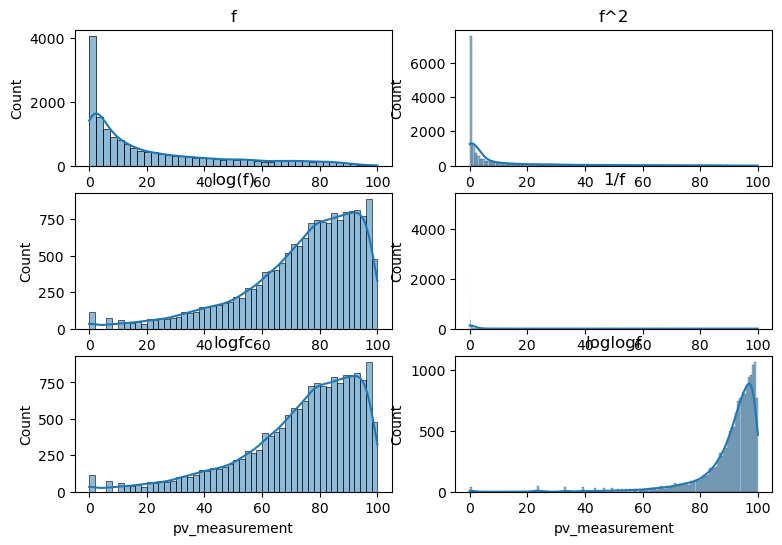

In [68]:
i = 45
token = True

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 6))
axes = axes.flatten()
feature = X_new.iloc[:,i]#.resample('M').mean()

f = normalize(feature)*100
sns.histplot(data=f, ax=axes[0], kde=True)
axes[0].set_title("f")

f2 = normalize((feature)**2)*100
sns.histplot(data=f2, ax=axes[1], kde=True)
axes[1].set_title("f^2")

logf = normalize(np.log(feature+.001))*100
sns.histplot(data=logf, ax=axes[2], kde=True)
axes[2].set_title("log(f)")

if token:
    f_1 = normalize(1/(feature+.5))*100
    sns.histplot(data=f_1, ax=axes[3], kde=True)
    axes[3].set_title("1/f")


c = (feature.quantile(.25)/feature.quantile(.75))**2
logfc = normalize(np.log(feature+c))*100
sns.histplot(data=logfc, ax=axes[4], kde=True)
axes[4].set_title("logfc")

loglogf = normalize(np.log(np.log(feature+.001)+.001))*100
sns.histplot(data=loglogf, ax=axes[5], kde=True)
axes[5].set_title("loglogf")


print('mean',np.mean(f),np.mean(f2), np.mean(logf), np.mean(f_1), np.mean(logfc), np.mean(loglogf))
print(f'var f:{np.var(f)}, f2:{np.var(f2)}, logf:{np.var(logf)}, f_1:{np.var(f_1)}, logfc:{np.var(logfc)}, loglogf:{np.var(loglogf)}')

In [124]:
transformations = [['absolute_humidity_2m:gm3', 'f'],
 ['air_density_2m:kgm3', '1/f'],
 ['ceiling_height_agl:m', 'f'],
 ['clear_sky_energy_1h:J', 'f'],
 ['clear_sky_rad:W', 'f'],
 ['cloud_base_agl:m', 'logfc'],
 ['dew_or_rime:idx', 'hot'],
 ['dew_point_2m:K', 'f^2'],
 ['diffuse_rad:W', 'logfc'],
 ['diffuse_rad_1h:J', 'logf'],
 ['direct_rad:W', 'loglogf'],
 ['direct_rad_1h:J', 'loglogf'],
 ['effective_cloud_cover:p', 'f^2'],
 ['elevation:m', 'constant'],
 ['fresh_snow_12h:cm', 'loglogf ou rien'],
 ['fresh_snow_1h:cm', 'loglogf ou rien'],
 ['fresh_snow_24h:cm', 'loglogf ou rien'],
 ['fresh_snow_3h:cm', 'loglogf ou rien'],
 ['fresh_snow_6h:cm', 'loglogf ou rien'],
 ['is_day:idx', 'hot'],
 ['is_in_shadow:idx', 'hot'],
 ['msl_pressure:hPa', 'f^2'],
 ['precip_5min:mm', 'loglogf ou rien'],
 ['precip_type_5min:idx', 'hot'],
 ['pressure_100m:hPa', 'f^2'],
 ['pressure_50m:hPa', 'f^2'],
 ['prob_rime:p', 'loglogf ou rien'],
 ['rain_water:kgm2', 'one hot à faire !'],
 ['relative_humidity_1000hPa:p', ''],
 ['sfc_pressure:hPa', 'f^3'],
 ['snow_density:kgm3', 'constant'],
 ['snow_depth:cm', 'loglogf ou rien'],
 ['snow_drift:idx', 'hot'],
 ['snow_melt_10min:mm', 'loglogf ou rien'],
 ['snow_water:kgm2', 'loglogf ou rien'],
 ['sun_azimuth:d', 'f ou f^2'],
 ['sun_elevation:d', 'f ou f^2'],
 ['super_cooled_liquid_water:kgm2', 'loglogf ou rien'],
 ['t_1000hPa:K', 'f^2'],
 ['total_cloud_cover:p', 'f^2 ou rien'],
 ['visibility:m', 'f'],
 ['wind_speed_10m:ms', 'f ou logfc'],
 ['wind_speed_u_10m:ms', 'f ou logfc'],
 ['wind_speed_v_10m:ms', 'f'],
 ['wind_speed_w_1000hPa:ms', 'hot'],
 ['pv_measurement', 'f']]

In [153]:
def normalize(feature):
    return (feature - feature.min())/(feature.max()-feature.min())

for feature, function in transformations:
    if function == '1/f':
        X[feature] = normalize(1/(X[feature]+.5))
    if function == 'logfc':
        X[feature] = normalize(np.log(X[feature] + (X[feature].quantile(.25)/X[feature].quantile(.75))**2 ))
    if function == 'f^2':
        X[feature] = normalize((X[feature])**2)
    if function == 'logf':
        X[feature] = normalize(np.log(X[feature]+.001))
    if function == 'f':
        X[feature] = normalize(X[feature])
    if function == 'loglogf':
        X[feature] = normalize(np.log(np.log(X[feature]+.001)+.001))

/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [132]:
drop = list(correlation(X_train_estimated_a) &correlation(X_train_observed_a)&correlation(X_test_estimated_a))

In [154]:
X.drop(drop, axis=1,inplace=True)

In [155]:
X.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,cloud_base_agl:m,dew_or_rime:idx,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
count,29667.000000,29667.000000,23031.000000,29667.000000,27210.000000,29667.000000,0.0,12506.000000,29667.000000,29667.0,29667.000000,29667.000000,29667.000000,29667.000000,29667.00000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,683.0,29667.000000,29667.0,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000,29667.000000
mean,0.354321,0.596185,0.228784,0.199490,0.604435,0.022786,NaN,0.916466,0.574284,6.0,0.053436,0.004426,0.106883,0.013362,0.02673,0.521792,0.513837,0.644751,0.006426,0.090100,0.189847,0.012050,74.231621,250.0,0.052830,0.0,0.000062,0.091634,182.434210,1.528839,0.059147,0.473182,74.310190,0.453569,3.043004,0.754845,0.548316,0.000024,0.117582
std,0.166557,0.132428,0.207675,0.292728,0.168242,0.191031,NaN,0.102770,0.389678,0.0,0.490057,0.076088,0.746023,0.182232,0.30690,0.499533,0.499817,0.126752,0.038576,0.377168,2.552443,0.048437,13.958472,0.0,0.409817,0.0,0.001880,0.258480,103.767756,24.148323,0.112498,0.148132,34.184728,0.256262,1.792318,2.858546,0.104031,0.001536,0.208520
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,NaN,0.000000,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.700000,250.0,0.000000,0.0,-0.000000,0.000000,0.012000,-49.941000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.300000,0.000000,-0.000000,0.000000
25%,0.220238,0.510252,0.084422,0.000000,0.501448,0.000000,NaN,0.894187,0.184041,6.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.566511,0.000000,0.000000,0.000000,0.000000,65.000000,250.0,0.000000,0.0,0.000000,0.000000,90.752000,-15.146500,0.000000,0.364222,53.700000,0.207941,1.700000,-1.400000,0.480447,0.000000,0.000000
50%,0.333333,0.601030,0.146032,0.012149,0.613986,0.000000,NaN,0.946665,0.654481,6.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.654844,0.000000,0.000000,0.000000,0.000000,76.700000,250.0,0.000000,0.0,0.000000,0.000000,179.522000,1.150000,0.000000,0.471254,94.800000,0.513963,2.700000,0.400000,0.547486,0.000000,0.002916
75%,0.470238,0.686872,0.308909,0.346945,0.710449,0.000000,NaN,0.975021,0.984064,6.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.732633,0.000000,0.000000,0.000000,0.000000,85.500000,250.0,0.000000,0.0,-0.000000,0.100000,273.257000,18.768500,0.100000,0.573272,100.000000,0.676620,4.100000,2.700000,0.614525,-0.000000,0.135854
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,6.0,15.000000,3.600000,15.000000,7.800000,14.60000,1.000000,1.000000,1.000000,1.380000,6.000000,83.400000,1.400000,100.000000,250.0,6.300000,0.0,0.120000,6.900000,359.996000,49.880000,1.400000,1.000000,100.000000,1.000000,15.200000,12.200000,1.000000,0.100000,1.000000


In [142]:
X_train_observed_a.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,118669.000000,118669.000000,96422.000000,1.186690e+05,118669.000000,110603.000000,118669.000000,118669.000000,118669.000000,1.186690e+05,118669.000000,1.186690e+05,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,2724.0,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000
mean,6.652576,1.249064,2907.949219,5.994018e+05,166.500381,1737.142212,0.022398,276.823395,44.918282,1.617057e+05,56.611744,2.038025e+05,67.605507,6.0,0.053117,0.004418,0.106243,0.013277,0.026567,0.521391,0.511650,1009.632996,0.006302,0.091018,996.765381,1002.868225,0.187399,0.011914,74.231705,1008.998352,250.0,0.052763,0.0,0.000062,0.091566,179.629486,1.529545,0.059087,280.708557,74.401077,32446.992188,3.043197,0.756781,0.517437,0.000019
std,2.796409,0.036317,2570.401855,8.797980e+05,244.907578,1815.570679,0.190339,6.701851,64.780273,2.301814e+05,119.745392,4.248438e+05,33.857571,0.0,0.489839,0.075659,0.746422,0.181746,0.306437,0.499342,0.499748,12.484639,0.037381,0.379524,12.351003,12.404640,2.519959,0.047560,13.889423,12.460940,0.0,0.409022,0.0,0.001884,0.249243,103.778503,24.146574,0.109520,6.573745,33.518063,17967.917969,1.779309,2.856045,1.851810,0.001392
min,0.700000,1.145000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,250.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,932.299988,938.099976,0.000000,0.000000,22.700001,943.900024,250.0,0.000000,0.0,-0.000000,0.000000,0.002000,-50.004002,0.000000,258.899994,0.000000,154.300003,0.000000,-7.300000,-9.300000,-0.000000
25%,4.400000,1.224000,1102.900024,0.000000e+00,0.000000,590.700012,0.000000,272.100006,0.000000,0.000000e+00,0.000000,0.000000e+00,43.299999,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.099976,0.000000,0.000000,989.299988,995.299988,0.000000,0.000000,65.000000,1001.400024,250.0,0.000000,0.0,0.000000,0.000000,88.487999,-15.066000,0.000000,275.899994,54.799999,15592.400391,1.700000,-1.400000,-0.700000,0.000000
50%,6.300000,1.247000,1882.400024,3.574770e+04,8.600000,1162.599976,0.000000,277.200012,4.100000,2.481410e+04,0.000000,8.960000e+01,80.500000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1010.700012,0.000000,0.000000,997.900024,1003.900024,0.000000,0.000000,76.699997,1010.000000,250.0,0.000000,0.0,0.000000,0.000000,179.436996,1.202000,0.000000,280.700012,93.699997,36359.800781,2.700000,0.400000,0.500000,0.000000
75%,8.600000,1.272000,3969.750000,1.037819e+06,288.799988,2079.600098,0.000000,282.000000,76.000000,2.743256e+05,41.799999,1.598314e+05,98.800003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1018.299988,0.000000,0.000000,1005.400024,1011.500000,0.000000,0.000000,85.400002,1017.599976,250.0,0.000000,0.0,0.000000,0.100000,270.640991,18.995001,0.100000,285.200012,99.900002,48084.500000

In [143]:
X_train_estimated_a.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,17576.000000,17576.000000,13657.000000,1.757600e+04,17576.000000,15482.000000,17576.000000,17576.000000,17576.000000,1.757600e+04,17576.000000,1.757600e+04,17576.000000,17576.0,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,1807.0,17576.000000,17576.0,17576.00000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.0
mean,4.092438,1.281746,3257.459473,2.371263e+05,65.868149,1575.233032,0.008990,270.222351,22.836435,8.221085e+04,25.725431,9.261137e+04,68.346710,6.0,0.325085,0.027555,0.628334,0.083136,0.164838,0.349226,0.695380,1009.408142,0.004077,0.075956,996.317566,1002.565063,0.532237,0.003146,72.632843,1008.840332,250.0,0.213575,0.0,0.00057,0.077008,179.677383,-10.692363,0.032556,274.722656,73.760681,33458.078125,3.183540,-0.015197,0.926172,0.0
std,1.511154,0.030050,2501.800537,5.173429e+05,144.163116,1718.793457,0.221532,5.215971,45.802551,1.626801e+05,79.093826,2.811956e+05,35.479538,0.0,1.045017,0.156180,1.653761,0.382714,0.647278,0.476771,0.460262,14.342333,0.021424,0.396588,14.189366,14.262826,4.566503,0.022420,14.001029,14.337602,0.0,0.739950,0.0,0.00562,0.189578,100.143867,21.688944,0.081633,4.639271,35.813072,16935.794922,1.790935,3.061173,1.765004,0.0
min,1.000000,1.212000,27.900000,0.000000e+00,0.000000,27.799999,-1.000000,254.699997,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,970.700012,0.000000,0.000000,958.299988,964.200012,0.000000,0.000000,21.500000,970.099976,250.0,0.000000,0.0,-0.00000,0.000000,0.013000,-50.004002,0.000000,259.700012,0.000000,190.500000,0.100000,-7.200000,-5.300000,-0.0
25%,3.000000,1.262000,1185.500000,0.000000e+00,0.000000,497.524994,0.000000,266.799988,0.000000,0.000000e+00,0.000000,0.000000e+00,42.700001,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.099976,0.000000,0.000000,986.200012,992.400024,0.000000,0.000000,63.099998,998.599976,250.0,0.000000,0.0,-0.00000,0.000000,94.669249,-28.210751,0.000000,271.799988,49.099998,19838.000488,1.700000,-2.200000,-0.200000,-0.0
50%,3.900000,1.279000,2750.000000,0.000000e+00,0.000000,935.750000,0.000000,270.399994,0.000000,0.000000e+00,0.000000,0.000000e+00,84.300003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1009.599976,0.000000,0.000000,996.400024,1002.700012,0.000000,0.000000,74.699997,1009.000000,250.0,0.000000,0.0,-0.00000,0.000000,179.510498,-9.930000,0.000000,274.700012,97.099998,34456.800781,2.900000,-0.300000,1.000000,-0.0
75%,5.100000,1.301000,4775.500000,1.374874e+05,37.400002,1919.599976,0.000000,273.899994,22.900000,8.024315e+04,0.800000,1.051160e+04,99.800003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1019.599976,0.000000,0.000000,1006.299988,1012.599976,0.000000,0.000000,83.400002,1019.000000,250.0,0.000000,0.0,0.00000,0.100000,264.569756,4.489000,0.000000,277.799988,100.000000,47726.226562,4.300000,1.600000,2.000000,0.0
max,8.800000,1.374000,12307.700195,2.555980

(array([[<Axes: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_energy_1h:J'>,
         <Axes: xlabel='clear_sky_rad:W', ylabel='clear_sky_energy_1h:J'>],
        [<Axes: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_rad:W'>,
         <Axes: xlabel='clear_sky_rad:W', ylabel='clear_sky_rad:W'>]],
       dtype=object),)

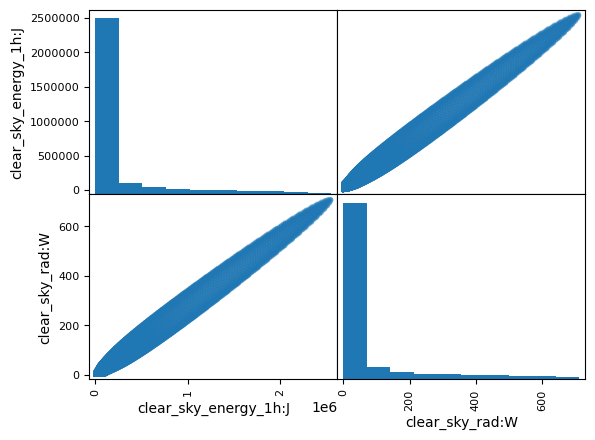

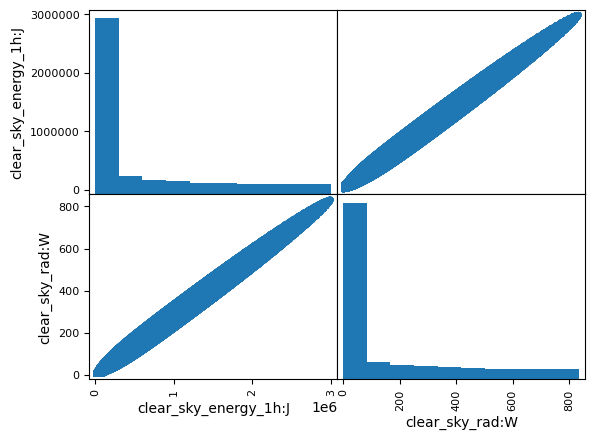

In [145]:
pd.plotting.scatter_matrix(X_train_estimated_a.iloc[:,3:5]),
pd.plotting.scatter_matrix(X_train_observed_a.iloc[:,3:5]),

In [158]:
X.drop(['diffuse_rad:W','direct_rad:W'], axis=1, inplace=True)

In [160]:
X

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,cloud_base_agl:m,dew_or_rime:idx,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement


In [159]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
kmeans.labels_
kmeans.cluster_centers_

ValueError: Found array with 0 sample(s) (shape=(0, 37)) while a minimum of 1 is required by KMeans.